<a href="https://colab.research.google.com/github/okanbuyuktepe/NLP-in-Tensorflow/blob/master/single_layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singel Layer LSTM

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info= True, as_supervised=True)
train_dataset , test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteU6KJP4/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteU6KJP4/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteU6KJP4/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [6]:
tokenizer = info.features['text'].encoder

In [10]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset  = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [11]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(test_dataset))

Epoch 1/10
391/391 [==============================] - 977s 2s/step - loss: 0.4777 - accuracy: 0.7832 - val_loss: 0.4436 - val_accuracy: 0.8094
Epoch 2/10
391/391 [==============================] - 1018s 3s/step - loss: 0.3516 - accuracy: 0.8599 - val_loss: 0.4682 - val_accuracy: 0.8005
Epoch 3/10
391/391 [==============================] - 1014s 3s/step - loss: 0.3141 - accuracy: 0.8790 - val_loss: 0.4224 - val_accuracy: 0.8158
Epoch 4/10
391/391 [==============================] - 1024s 3s/step - loss: 0.3178 - accuracy: 0.8766 - val_loss: 0.5090 - val_accuracy: 0.7740
Epoch 5/10
391/391 [==============================] - 1021s 3s/step - loss: 0.2345 - accuracy: 0.9121 - val_loss: 0.4678 - val_accuracy: 0.8210
Epoch 6/10
391/391 [==============================] - 1027s 3s/step - loss: 0.2520 - accuracy: 0.9000 - val_loss: 0.5188 - val_accuracy: 0.7793
Epoch 7/10
391/391 [==============================] - 1029s 3s/step - loss: 0.1854 - accuracy: 0.9334 - val_loss: 0.5092 - val_accuracy: 

In [19]:
import matplotlib.pyplot as plt

In [22]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

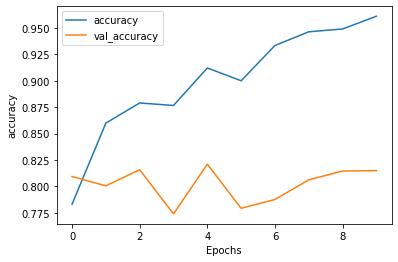

In [23]:
plot_graphs(history, 'accuracy')

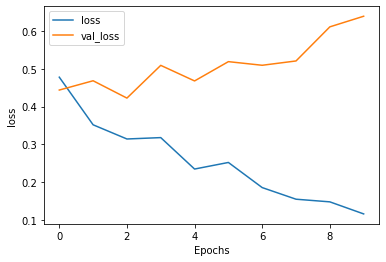

In [24]:
plot_graphs(history, 'loss')